### ****Financial Analysis of NBG (National Bank of Greece) Stock Performance, before and after the Greek Debt Crisis****###

In [47]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Load and Inscpect the data
data = pd.read_csv('NBG.csv', parse_dates = ['Date'], index_col = 'Date')

# Keep only the Adjusted close price and the volume
data = data[['Adj Close',	'Volume']]
data.rename(columns = {'Adj Close': 'Price'}, inplace = True)

print("""
Nan values: {}
Shape of the data: {}
""".format(*data.isnull().sum()), data.shape)


Nan values: 0
Shape of the data: 0
 (4857, 2)


###**Plot the overall NBG's performance**###

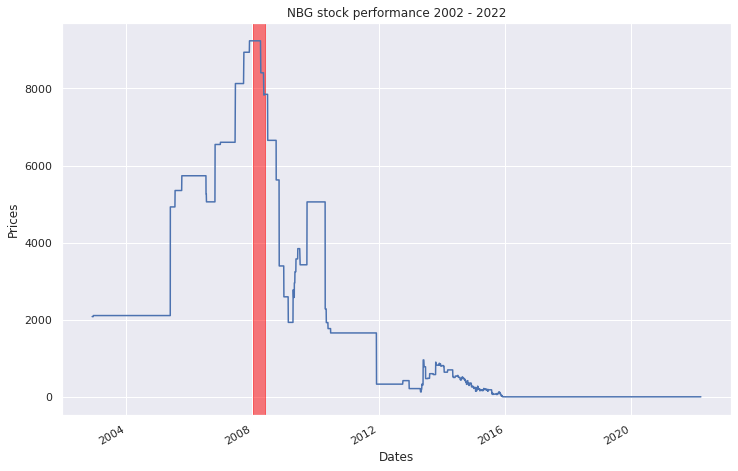

In [124]:
sns.set()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot_date(data.index, data.Price, 'b-')
ax.axvspan(*mdates.datestr2num(['2008-1-04', '2008-05-28']), color='red', alpha=0.5)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices')
ax.set_title('NBG stock performance 2002 - 2022')
fig.autofmt_xdate()
plt.show()

###Split the data into two categories, before and after the 2008 Debt Crisis###

In [49]:
data_before = data[data.index <= '2007-12-31']
data_after = data[data.index >= '2008-01-04']

###Plot the Moving Averages of 30, 90, 180 and 360 days, for each period###

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

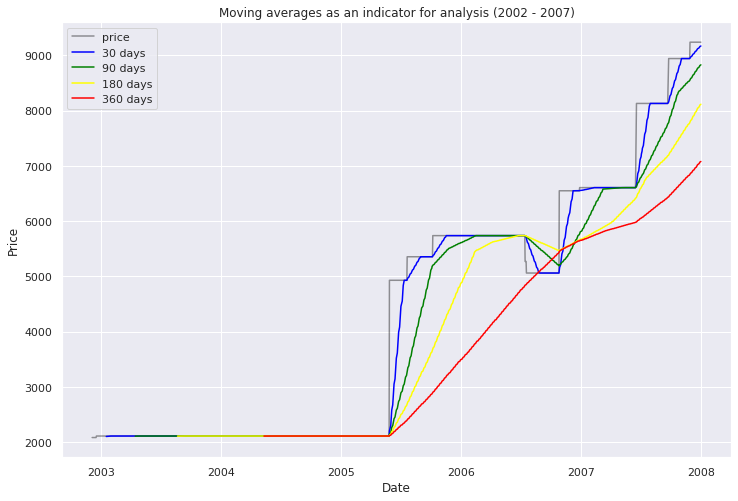

In [123]:
# Moving averages for 2002 - 2009 

data_before['MA_30'] = data_before.Price.rolling(window = 30).mean()
data_before['MA_90'] = data_before.Price.rolling(window = 90).mean()
data_before['MA_180'] = data_before.Price.rolling(window = 180).mean()
data_before['MA_360'] = data_before.Price.rolling(window = 360).mean()

plt.figure(figsize = (12, 8))

plt.plot(data_before.Price, label = 'price', color = 'black', alpha = 0.4)
plt.plot(data_before.MA_30, label = '30 days', color = 'blue')
plt.plot(data_before.MA_90, label = '90 days', color = 'green')
plt.plot(data_before.MA_180, label = '180 days', color = 'yellow')
plt.plot(data_before.MA_360, label = '360 days', color = 'red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages as an indicator for analysis (2002 - 2007)')
plt.legend(loc = 'best')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

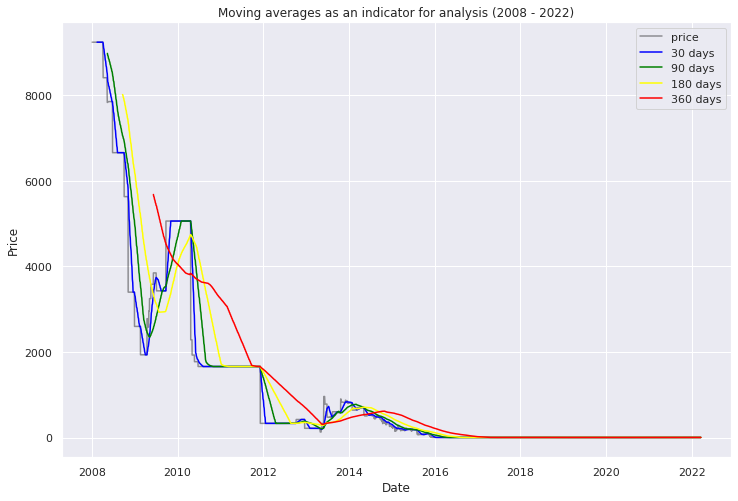

In [122]:
# Moving averages for 2008 - 2022

data_after['MA_30'] = data_after.Price.rolling(window = 30).mean()
data_after['MA_90'] = data_after.Price.rolling(window = 90).mean()
data_after['MA_180'] = data_after.Price.rolling(window = 180).mean()
data_after['MA_360'] = data_after.Price.rolling(window = 360).mean()

plt.figure(figsize = (12, 8))

plt.plot(data_after.Price, label = 'price', color = 'black', alpha = 0.4)
plt.plot(data_after.MA_30, label = '30 days', color = 'blue')
plt.plot(data_after.MA_90, label = '90 days', color = 'green')
plt.plot(data_after.MA_180, label = '180 days', color = 'yellow')
plt.plot(data_after.MA_360, label = '360 days', color = 'red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages as an indicator for analysis (2008 - 2022)')
plt.legend(loc = 'best')
plt.show()

###Some basic statistics###

In [52]:
# Before the Debt Crisis
data_before.describe(include = 'all')

,Price,Volume,MA_30,MA_90,MA_180,MA_360
count,1277.000000,1277.0,1248.000000,1188.000000,1098.000000,918.000000
mean,4299.196501,0.0,4267.587730,4204.140854,4125.732048,4040.475340
std,2323.708797,0.0,2264.950202,2142.608735,1973.710289,1704.341999
min,2083.552979,0.0,2102.646607,2108.101929,2109.465759,2110.147675
25%,2110.829590,0.0,2110.829590,2110.829590,2110.829590,2110.829590
50%,4928.540527,0.0,4881.578678,4084.816251,3937.370504,3930.576243
75%,5736.734375,0.0,5736.734375,5736.734375,5711.668292,5726.083892
max,9236.502930,0.0,9167.402311,8826.584918,8113.632805,7078.058137


In [53]:
# After the Debt Crisis
data_after.describe(include = 'all')

,Price,Volume,MA_30,MA_90,MA_180,MA_360
count,3578.000000,3578.000000,3549.000000,3489.000000,3399.000000,3219.000000
mean,1151.939092,8641.246786,1123.600892,1064.402493,985.794743,882.770233
std,2072.240902,22505.002102,2005.190109,1852.242274,1635.160550,1370.401671
min,0.942893,0.000000,1.132851,1.268629,1.288401,1.951711
25%,2.790194,0.000000,2.793433,2.742835,2.692946,2.642863
50%,207.099716,0.000000,207.580785,210.066306,246.928929,275.882800
75%,1659.684082,4967.500000,1659.684082,1659.684082,1368.317324,1016.095483
max,9236.502930,287700.000000,9236.502930,8974.721908,8013.694149,5678.961197


###Cummulative Returns###

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


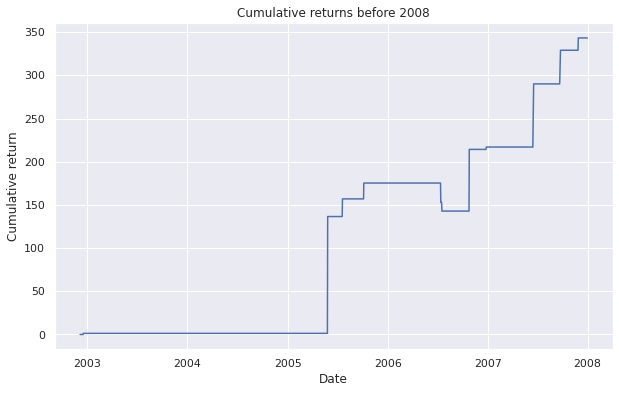

In [121]:
# Before 2008
data_before['returns'] = data_before.Price.pct_change()
returns_plus_one = data_before.returns.add(1)
cummulative_returns = returns_plus_one.cumprod().sub(1)
cummulative_returns = cummulative_returns.mul(100)


plt.figure(figsize = (10, 6))
plt.plot(data_before.index, cummulative_returns)

plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title('Cumulative returns before 2008')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


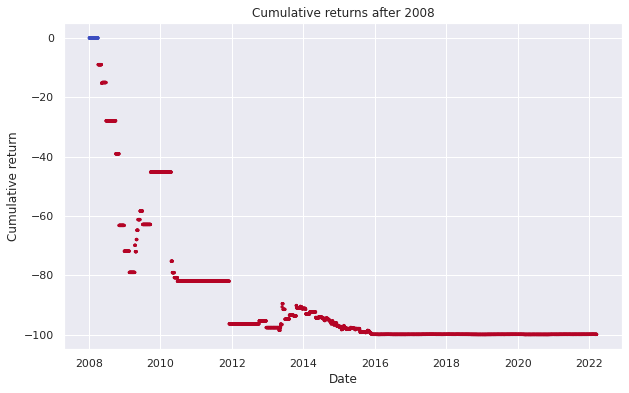

In [120]:
# After 2008

data_after['returns'] = data_after.Price.pct_change()
returns_plus_one = data_after.returns.add(1)
cummulative_returns = returns_plus_one.cumprod().sub(1)
cummulative_returns = cummulative_returns.mul(100)

condition = [i < 0 for i in cummulative_returns]

plt.figure(figsize = (10, 6))
plt.scatter(data_after.index, cummulative_returns, c = condition, s = 5, cmap='coolwarm')


plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title('Cumulative returns after 2008')
plt.show()

In [56]:
# What if you had Invest  $10.000 in 2002

investment = 10000

data['returns'] = data.Price.pct_change()
current_value = data.returns.add(1).cumprod().mul(investment)[-1]
loss = data.returns.add(1).cumprod().sub(1).mul(investment)[-1]

print("""
Initial Investment in 2002: ${}
2022 Investment's value: ${}
Total loss: ${}
""".format(investment, np.round(current_value,1), np.round(loss,1)))


Initial Investment in 2002: $10000
2022 Investment's value: $15.6
Total loss: $-9984.4



In [57]:
current_value

15.59835546663103

###A Random Walk of NBG's daily returns###

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


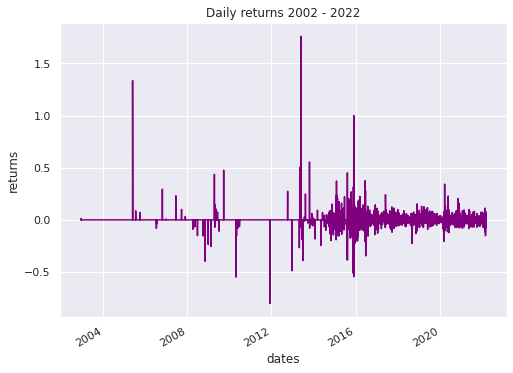

In [119]:
from numpy.random import normal, seed
from scipy.stats import norm
from numpy.random import choice

seed(42)

df = data[['Price']]
df['returns'] = df.pct_change()
plt.figure(figsize = (8, 6))

df.returns.plot(color = 'purple')
plt.xlabel('dates')
plt.ylabel('returns')
plt.title('Daily returns 2002 - 2022')
plt.show()

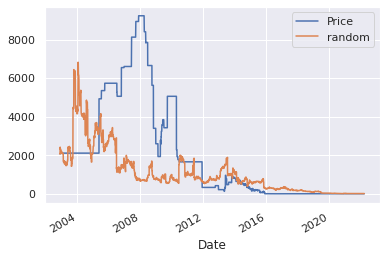

In [59]:
sample = df.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, n_obs)
random_walk = pd.Series(random_walk, index = sample.index)

start_date = df.Price.first('D')
nbs_random = start_date.append(random_walk.add(1))
df['random'] = nbs_random.cumprod()

df[['Price', 'random']].plot()

##The Empirical cummulative distribution function of the daily returns against a CDF of a normal distribution###

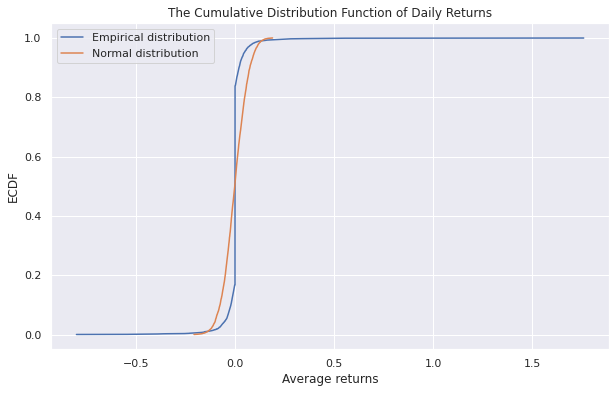

In [60]:
# Create the Empirical cummulative distribution function of the daily returns and plot them against a CDF of a normal distribution

def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

normal_dist_data = np.random.normal(np.mean(data.returns), np.std(data.returns), size = len(data.returns))

plt.figure(figsize = (10, 6))
plt.plot(*ecdf(data.returns), label = 'Empirical distribution')
plt.plot(*ecdf(normal_dist_data), label = 'Normal distribution')
plt.xlabel('Average returns')
plt.ylabel('ECDF')
plt.title('The Cumulative Distribution Function of Daily Returns')
plt.legend()
plt.show()

###100.000 replicates with the standard deviation as the test statistic, to measure risk###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


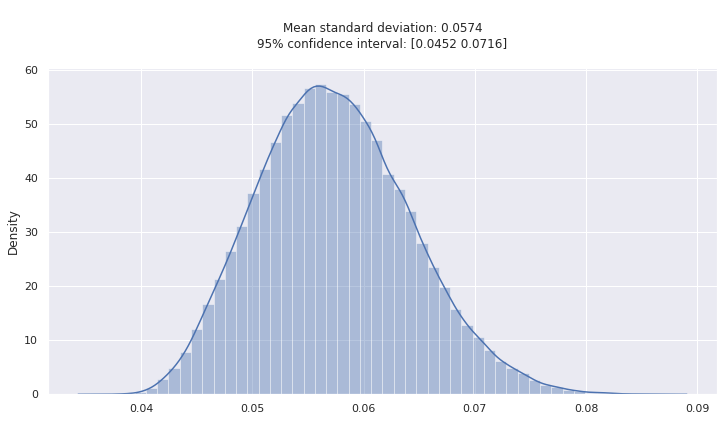

In [61]:
def bootstrap_replicates(data, func):
  samples = np.random.choice(data, size = len(data))
  return func(samples)

def draw_bs_reps(data, func, size = 1):
  bs_replicates = np.empty(size)
  for i in range(size):
    bs_replicates[i] = bootstrap_replicates(data, func)
  return bs_replicates

daily_returns = data.returns[1:]
replicates = draw_bs_reps(daily_returns, np.std, size = 100000)

confidence_interval = np.percentile(replicates, [2.5, 97.5])
mean_std = np.mean(replicates)

plt.figure(figsize = (12, 6))
sns.distplot(replicates, kde=True)
plt.title("""
Mean standard deviation: {}
95% confidence interval: {}
""".format(np.round(mean_std, 4), np.round(confidence_interval, 4)))
plt.show()



##Maximum gains and losses on monthly returns##

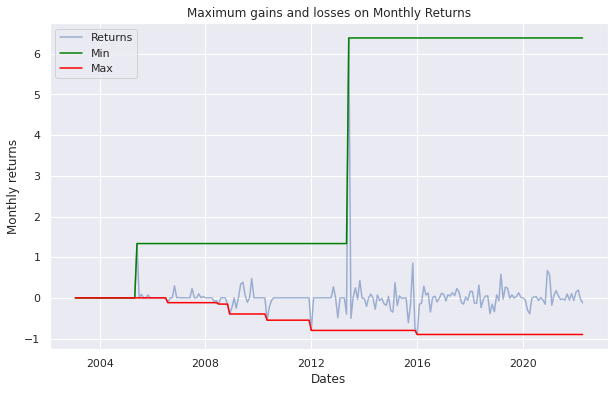

In [117]:
monthly_returns = pd.DataFrame(data.Price.resample('M').last().ffill().pct_change())

monthly_returns['running_min'] = monthly_returns.expanding().min()
monthly_returns['running_max'] = monthly_returns.Price.expanding().max()

plt.figure(figsize = (10, 6))
plt.plot(monthly_returns.Price, alpha = 0.5)
plt.plot(monthly_returns.running_max, color = 'green')
plt.plot(monthly_returns.running_min, color = 'red')
plt.ylabel('Monthly returns')
plt.xlabel('Dates')
plt.title('Maximum gains and losses on Monthly Returns')
plt.legend(['Returns', 'Min', 'Max'])
plt.show()



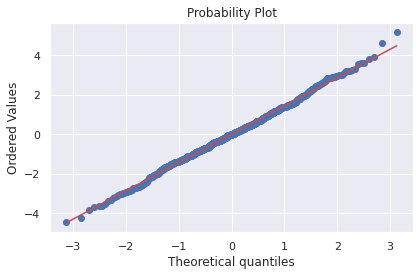

In [113]:
from scipy import stats
from sklearn.utils import resample

# How the daily returns distribution fits a normal distribtuion

daily_returns = data.returns
returns = np.diff(np.log(daily_returns[daily_returns > 0]))

fig, ax = plt.subplots(figsize = (6, 4))
stats.probplot(returns, plot = ax)
plt.tight_layout()
plt.show()


##Probabilities of having negative returns for more than 100 days in a year (resampling under the Binomial distribution)##

The probabilities to have more than 100 negative returns in 253 days is: 49.946




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


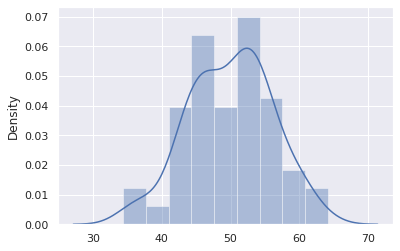

In [101]:
from scipy.stats import binom

k = 100
probabilitites_for_more_than_50_negative_returns = []

# Generate 100 replicates with the probabilitites of having more than 50 days of negative returns
for i in range(100):

  # Draw 10000 samples of daily returns 
  results = np.empty(10000)
  for i in range(10000):
    sample = resample(data.returns)
    results[i] = sample.mean()

  # Calculate the probabilities of having negative returns in each sample 
  prob_for_negative_return = len(results[results < 0]) / len(results)

  # Under the Binomial Distribution calculate the probabilities of having more than 50 days of negative returns in a year 
  probabilitites_for_more_than_50_negative_returns.append(100 - binom.cdf(k = k, n = 253, p = prob_for_negative_return) * 100)

print(f'The probabilities to have more than {k} negative returns in 253 days is: {np.round(np.mean(probabilitites_for_more_than_50_negative_returns), 3)}') 
print("""
""")
sns.distplot(probabilitites_for_more_than_50_negative_returns)
plt.show()


Mean of the original data: 49.95
Mean generated by 10.000 bootstrap reps: 49.93
Bias: -0.01
Standard error: 6.05
95% Confidence interval: [37.05241283 60.97346557]



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


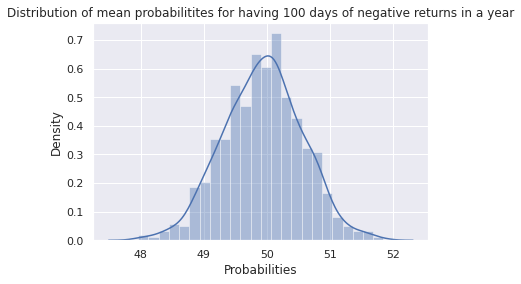

In [112]:
# Draw 1000 bootstrap replicates of the probabilitites to have more than 100 days with negative returns
bootstrap_replicates = []

for i in range(1000):
  samples = resample(probabilitites_for_more_than_50_negative_returns)
  bootstrap_replicates.append(np.mean(samples))

print("""
Mean of the original data: {}
Mean generated by 10.000 bootstrap reps: {}
Bias: {}
Standard error: {}
95% Confidence interval: {}
""".format(np.round(np.mean(probabilitites_for_more_than_50_negative_returns), 2), np.round(np.mean(bootstrap_replicates), 2), 
           np.round(np.mean(bootstrap_replicates) - np.mean(probabilitites_for_more_than_50_negative_returns), 2), np.round(np.std(probabilitites_for_more_than_50_negative_returns), 2),
           np.percentile(probabilitites_for_more_than_50_negative_returns, [2.5, 97.5])))

sns.distplot(bootstrap_replicates)
plt.title('Distribution of mean probabilitites for having 100 days of negative returns in a year')
plt.xlabel('Probabilities')
plt.show()